In [1]:
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# first class
np.seed = 7
feature_num = 2
n = 100
train_data = np.random.normal(size=(n, feature_num))
train_labels = np.zeros(n)

# second class
train_data = np.r_[train_data, np.random.normal(size=(n, feature_num), loc=2)]
train_labels = np.r_[train_labels, np.ones(n)]

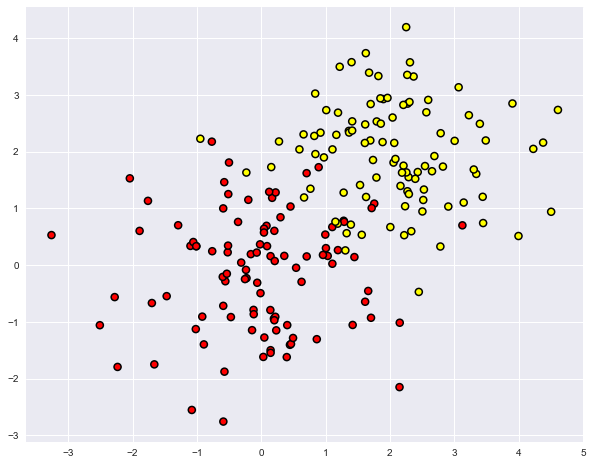

In [3]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=50, 
            cmap='autumn', edgecolors='black', linewidth=1.5);

## Обучение

In [4]:
from sklearn.tree import DecisionTreeClassifier
## min_samples_leaf минимальное количество элементов в узле
clf_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 17)
clf_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [5]:
## обучение
clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [6]:
## отрисовка

def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [7]:
xx, yy = get_grid(train_data)
## ravel  flattened array
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

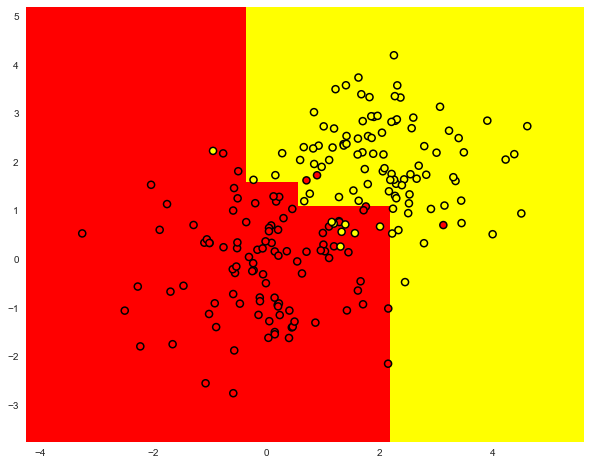

In [8]:
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=50,
            cmap='autumn', edgecolors='black', linewidth=1.5);

In [9]:
from sklearn.tree import export_graphviz
export_graphviz(clf_tree, feature_names=['x1', 'x2'], 
out_file='img/small_tree.dot', filled=True)
# pydot (pip install pydot)
!dot -Tpng 'img/small_tree.dot' -o 'img/small_tree.png'

![ll](img/small_tree.png)

## Количественные признаки в дереве решения

In [10]:
data = pd.DataFrame({'Возраст': [17,64,18,20,38,49,55,25,29,31,33], 
                     'Невозврат кредита': [1,0,1,0,1,0,0,1,1,0,1]})

In [11]:
data.sort_values('Возраст')

,Возраст,Невозврат кредита
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [12]:
## Обучаем дерево без ограничений глубины
age_tree = DecisionTreeClassifier(random_state = 17)
age_tree.fit(data['Возраст'].values.reshape(-1, 1), data['Невозврат кредита'].values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

Видим, что дерево задействовало 5 значений, с которыми сравнивается возраст: 43.5, 19, 22.5, 30 и 32 года. Если приглядеться, то это аккурат средние значения между возрастами, при которых целевой класс "меняется" с 1 на 0 или наоборот. Сложная фраза, поэтому пример: 43.5 – это среднее между 38 и 49 годами, клиент, которому 38 лет не вернул кредит, а тот, которому 49 – вернул. Аналогично, 19 лет – среднее между 18 и 20 годами. То есть в качестве порогов для "нарезания" количественного признака, дерево "смотрит" на те значения, при которых целевой класс меняет свое значение.

In [13]:
export_graphviz(age_tree, feature_names=['Возраст'], 
               out_file = 'img/age_tree.dot', filled=True)
!dot -Tpng 'img/age_tree.dot' -o 'img/age_tree.png'

![](img/age_tree.png)

## Пример 2 (Зарплата)

In [14]:
data2 = pd.DataFrame({'Возраст':  [17,64,18,20,38,49,55,25,29,31,33], 
                      'Зарплата': [25,80,22,36,37,59,74,70,33,102,88], 
             'Невозврат кредита': [1,0,1,0,1,0,0,1,1,0,1]})

In [15]:
data2.sort_values('Возраст')

,Возраст,Зарплата,Невозврат кредита
0,17,25,1
2,18,22,1
3,20,36,0
7,25,70,1
8,29,33,1
9,31,102,0
10,33,88,1
4,38,37,1
5,49,59,0
6,55,74,0


In [16]:
data2.sort_values('Зарплата')

,Возраст,Зарплата,Невозврат кредита
2,18,22,1
0,17,25,1
8,29,33,1
3,20,36,0
4,38,37,1
5,49,59,0
7,25,70,1
6,55,74,0
1,64,80,0
10,33,88,1


In [17]:
## Обучаем дерево без ограничений глубины
age_tree_sal = DecisionTreeClassifier(random_state = 17)
age_tree_sal.fit(data2[['Возраст', 'Зарплата']].values, data2['Невозврат кредита'].values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [18]:
export_graphviz(age_tree_sal, feature_names=['Возраст', 'Зарплата'], 
               out_file = 'img/age_tree_sal.dot', filled=True)
!dot -Tpng 'img/age_tree_sal.dot' -o 'img/age_tree_sal.png'

![](img/age_tree_sal.png)


Видим, что в дереве задействованы как разбиения по возрасту, так и по зарплате. Причем пороги, с которыми сравниваются признаки: 43.5 и 22.5 года – для возраста и 95 и 30.5 тыс. руб/мес – для зарплаты. И опять можно заметить, что 95 тыс. – это среднее между 88 и 102, при этом человек с зарплатой 88 оказался "плохим", а с 102 – "хорошим". То же самое для 30.5 тыс. То есть перебирались сравнения зарплаты и возраста не со всеми возможными значениями, а только с несколькими. А почему в дереве оказались именно эти признаки? Потому что по ним разбиения оказались лучше (по критерию неопределенности Джини).

**Вывод:** самая простая эвристика для обработки количественных признаков в дереве решений: количественный признак сортируется по возрастанию, и в дереве проверяются только те пороги, при которых целевой признак меняет значение. Звучит не очень строго, но надеюсь, я донес смысл с помощью игрушечных примеров.

Дополнительно, когда в данных много количественных признаков, и у каждого много уникальных значений, могут отбираться не все пороги, описанные выше, а только топ-N, дающих максимальный прирост все того же критерия. То есть, по сути, для каждого порога строится дерево глубины 1, считается насколько снизилась энтропия (или неопределенность Джини) и выбираются только лучшие пороги, с которыми стоит сравнивать количественный признак.

Для иллюстрации: при разбиении по признаку "Зарплата $\leq$ 34.5" в левой подгруппе энтропия 0 (все клиенты "плохие"), а в правой – 0.954 (3 "плохих" и 5 "хороших", можете проверить, 1 часть домашнего задания будет как раз на то, чтоб разобраться досканально с построением деревьев). Прирост информации получается примерно 0.3. А при разбиении по признаку "Зарплата $\leq$ 95" в левой подгруппе энтропия 0.97 (6 "плохих" и 4 "хороших"), а в правой – 0 (всего один объект). Прирост информации получается примерно 0.11. Посчитав таким образом прирост информации для каждого разбиения, можно предварительно, до построения большого дерева (по всем признакам) отобрать пороги, с которыми будет сравниваться каждый количественный признак.

## Играем с параметрами

В принципе дерево решений можно построить до такой глубины, чтоб в каждом листе был ровно один объект. Но на практике это не делается из-за того, что такое дерево будет переобученным – оно слишком настроится на обучающую выборку и будет плохо работать на прогноз на новых данных. Где-то внизу дерева, на большой глубине будут появляться разбиения по менее важным признакам (например, приехал ли клиент из Саратова или Костромы). Если утрировать, может оказаться так, что из всех 4 клиентов, пришедших в банк за кредитом в зеленых штанах, никто не вернул кредит. Но мы не хотим, чтобы наша модель классификации порождала такие специфичные правила.

Основные способы борьбы с переобучением в случае деревьев решений:
* искусственное ограничение глубины или минимального числа объектов в листе: построение дерева просто в какой-то момент прекращается;
* стрижка дерева (pruning). При таком подходе дерево сначала строится до максимальной глубины, потом постепенно, снизу вверх, некоторые вершины дерева убираются за счет сравнения по качеству дерева с данным разбиением и без него (сравнение проводится с помощью кросс-валидации, о которой чуть ниже). Подробнее можно почитать в материалах репозитория Евгения Соколова.

Основные параметры класса [sklearn.tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):
* **max_depth** – максимальная глубина дерева
* **max_features** - максимальное число признаков, по которым ищется лучшее разбиение в дереве (это нужно потому, что при большом количестве признаков будет "дорого" искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков)
* **min_samples_leaf** – минимальное число объектов в листе. У этого параметра есть понятная интерпретация: скажем, если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как мимимум для 5 объектов

## Дерево решений и регрессия 

При прогнозировании количественного признака идея построения дерева остается та же, но меняется критерий качества:

Дисперсия вокруг среднего: $$\Large D = \frac{1}{\ell} \sum\limits_{i =1}^{\ell} (y_i - \frac{1}{\ell} \sum\limits_{i =1}^{\ell} y_i)^2, $$ где $\ell$ – число объектов в листе, $y_i$ – значения целевого признака. Попросту говоря, минимизируя дисперсию вокруг среднего, мы ищем признаки, разбивающие выборку таким образом, что значения целевого признака в каждом листе примерно равны.

Сгенерируем данные, распределенные вокруг функции $f(x) = e^{-x ^ 2} + 1.5 * e^{-(x - 2) ^ 2}$ c некоторым шумом.

In [19]:
n_train = 150
n_test = 1000
noise = 0.01

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y
    

In [20]:
X_train, Y_train = generate(n_samples=n_train, noise=noise)
X_test, Y_test = generate(n_samples=n_test, noise=noise)

In [21]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)
reg_tree

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=17,
           splitter='best')

In [22]:
reg_tree.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=17,
           splitter='best')

In [23]:
reg_tree_pred = reg_tree.predict(X_test)

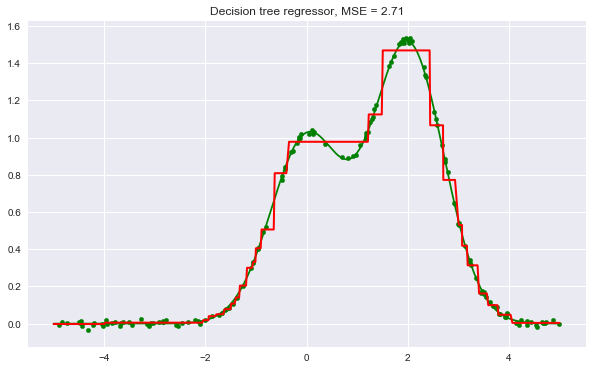

In [24]:
## Отрисовка
plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), 'g')
plt.scatter(X_train, Y_train, c='g', s=20)
plt.plot(X_test, reg_tree_pred, 'r', lw=2)
plt.title('Decision tree regressor, MSE = %.2f' % np.sum((Y_test - reg_tree_pred) ** 2))

## Метод ближайших соседей

Это, наравне с деревом решений, один из самых понятных подходов к классификации. На уровне интуиции суть метода такова: посмотри на соседей, какие преобладают, таков и ты. Формально основой метода является гипотезой компактности: если метрика расстояния между примерами введена достаточно удачно, то схожие примеры гораздо чаще лежат в одном классе, чем в разных.

Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:
Вычислить расстояние до каждого из объектов обучающей выборки
Отобрать $k$ объектов обучающей выборки, расстояние до которых минимально
Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди $k$ ближайших соседей
Примечательное свойство такого подхода – его ленивость. Это значит, что вычисления начинаются только в момент классификации тестового примера, а заранее, только при наличии обучающих примеров, никакая модель не строится. В этом отличие, например, от ранее рассмотренного дерева решений, где сначала на основе обучающей выборки строится дерево, а потом относительно быстро происходит классификация тестовых примеров.

Авторы классической книги "The Elements of Statistical Learning" считают kNN теоретически идеальным алгоритмом, применимость которого просто ограничена вычислительными возможностями и проклятием размерностей.

Качество классификации методом ближайших соседей зависит от нескольких параметров:
* число соседей
* метрика расстояния между объектами (часто используются метрика Хэмминга, евклидово расстояние, косинусное расстояние и расстояние Минковского). Отметим, что при использовании большинства метрик значения признаков надо масштабировать. Условно говоря, чтобы признак "Зарплата" с диапазоном значений до 100 тысяч не вносил больший вклад в расстояние, чем "Возраст" со значениями до 100.
* веса соседей (соседи тестового примера могут входить с разными весами, например, чем дальше пример, тем с меньшим коэффициентом учитывается его "голос")


## Класс KNeighborsClassifier в Scikit-learn
Основные параметры класса sklearn.neighbors.KNeighborsClassifier:
* **weights:** "uniform" (все веса равны), "distance" (вес обратно пропорционален расстоянию до тестового примера) или другая определенная пользователем функция
**algorithm (опционально):** "brute", "ball_tree", "KD_tree", или "auto". В первом случае ближайшие соседи для каждого тестового примера считаются перебором обучающей выборки. Во втором и третьем - расстояние между примерами хранятся в дереве, что ускоряет нахождение ближайших соседей. В случае указания параметра "auto" подходящий способ нахождения соседей будет выбран автматически на основе обучающей выборки.
* **leaf_size (опционально):** порог переключения на полный перебор в случае выбора BallTree или KDTree для нахождения соседей
* **metric:** "minkowski", "manhattan", "euclidean", "chebyshev" и другие


## Выбор параметров модели и кросс-валидация
Главная задача обучаемых алгоритмов – их способность обобщаться, то есть хорошо работать на новых данных. Поскольку, на новых данных мы сразу не можем проверить качество построенной модели (нам ведь надо для них сделать прогноз, то есть истинных значений целевого признака мы для них не знаем), то надо пожертвовать небольшой порцией данных, чтоб на ней проверить качество модели.

Чаще всего это делается одним из 2 способов:
* отложенная выборка (**held-out/hold-out set**). При таком подходе мы оставляем какую-то долю обучающей выборки (как правило от 20% до 40%), обучаем модель на остальных данных (60-80% исходной выборки) и считаем некоторую метрику качества модели (например, самое простое – долю правильных ответов в задаче классификации) на отложенной выборке.
* кросс-валидация (**cross-validation**, на русский еще переводят как скользящий или перекрестный контроль). Тут самый частый случай – K-fold кросс-валидация

Тут модель обучается K раз на разных (K-1) подвыборках исходной выборки (белый цвет), а проверяется на одной подвыборке (каждый раз на разной, оранжевый цвет). Получаются $K$ оценок качества модели, которые обычно усредняются, выдавая среднюю оценку качества классификации/регресии на кросс-валидации.

Кросс-валидация дает лучшую по сравнению отложенной выборкой оценку качества модели на новых данных. Но кросс-валидация вычислительно дорогостоящая, если данных много.

Кросс-валидация – очень важная техника в машинном обучении (применяемая также в статистике и эконометрике), с ее помощью выбираются гиперпараметры моделей, сравниваются модели между собой, оценивается полезность новых признаков в задаче и т.д. Более подробно можно почитать, например, тут у Sebastian Raschka или в любом классическом учебнике по машинному (статистическому) обучению

## Не игрушечный пример для оттока клиентов (деревья решений и метод ближайших соседей) 

In [25]:
df = pd.read_csv('../data/telecom_churn.csv')

In [26]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Считаем данные в DataFrame и проведем предобработку. Штаты пока сохраним в отдельный объект Series, но удалим из датафрейма. Первую модель будем обучать без штатов, потом посмотрим, помогают ли он

In [27]:
df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']
y = df['Churn']
df.drop(['State', 'Churn'], axis=1, inplace=True)

In [28]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


### Model selection in sklearn

In [29]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [30]:
X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3, random_state=17)

In [31]:
## обучаем две модели
from sklearn.neighbors import KNeighborsClassifier

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)
tree, knn

(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=17, splitter='best'),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=10, p=2,
            weights='uniform'))

In [32]:
%%time
tree.fit(X_train, y_train)

CPU times: user 14.9 ms, sys: 2.5 ms, total: 17.4 ms
Wall time: 15.8 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [33]:
%%time
knn.fit(X_train, y_train)

CPU times: user 3.88 ms, sys: 1.44 ms, total: 5.33 ms
Wall time: 5.28 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

Качество прогнозов будем проверять с помощью простой метрики – доли правильных ответов

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred)

0.93999999999999995

In [36]:
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred)

0.88100000000000001

## Cross validation

Настроим параметры с помощью кросс валидации. Настраивать будем глубину и максимальное число признаков при разбиении. Суть того, как работает **GridSearchCV**: для каждой уникальной пары значений параметров max_depth и max_features будет проведена 5-кратная кросс-валидация и выберется лучшее сочетание параметров.

In [37]:
from sklearn.model_selection import GridSearchCV, cross_val_score

## Tree

In [38]:
tree_params = {'max_depth': range(1, 11),
               'max_features': range(4, 19)}
tree_params

{'max_depth': range(1, 11), 'max_features': range(4, 19)}

In [39]:
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=1, verbose=True)

In [40]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    6.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)


Лучшее сочетание параметров и соответствующая средняя доля правильных ответов на кросс-валидации:

In [41]:
tree_grid.best_params_

{'max_depth': 6, 'max_features': 17}

In [42]:
tree_grid.best_score_

0.94256322331761677

In [43]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.94599999999999995

### kNN

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [45]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_pipe

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'))])

In [46]:
knn_params = {'knn__n_neighbors': range(1, 10)}

In [47]:
knn_grid = GridSearchCV(knn_pipe, knn_params, 
                        cv=5, n_jobs=-1,
                        verbose=True)

In [48]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'knn__n_neighbors': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [49]:
knn_grid.best_params_

{'knn__n_neighbors': 7}

In [50]:
knn_grid.best_score_

0.88598371195885128

In [51]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

0.89000000000000001

## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
np.mean(cross_val_score(forest, X_train, y_train, cv=5))

0.94942331198132557

In [54]:
forest_params = {'max_depth': range(1, 11), 
                 'max_features': range(4, 19)}

In [55]:
forest_grid = GridSearchCV(forest, forest_params, 
                           cv=5, n_jobs=-1, 
                           verbose=True)

In [56]:
forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  3.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=17,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [57]:
forest_grid.best_params_

{'max_depth': 9, 'max_features': 6}

In [58]:
forest_grid.best_score_

0.95113587655379339

In [59]:
accuracy_score(y_holdout, forest_grid.predict(X_holdout))

0.95299999999999996

In [60]:
export_graphviz(tree_grid.best_estimator_, feature_names=df.columns, 
               out_file = 'img/churn_tree.dot', filled=True)
!dot -Tpng 'img/churn_tree.dot' -o 'img/churn_tree.png'

![](img/churn_tree.png)

## MNIST

In [61]:
from sklearn.datasets import load_digits

In [62]:
## load data
data = load_digits()
X, y = data.data, data.target

Картинки здесь представляются матрицей 8 x 8 (интенсивности белого цвета для каждого пикселя). Далее эта матрица "разворачивается" в вектор длины 64, получается признаковое описание объекта.

In [63]:
X[0, :].reshape([8, 8])

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

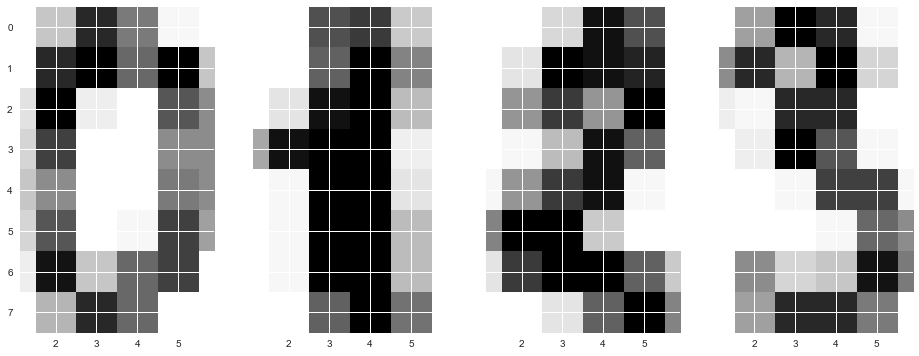

In [64]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
    axes[i].imshow(X[i,:].reshape([8, 8]))


Посмотрим на соотношение классов в выборке, видим, что примерно поровну нулей, единиц, ..., девяток.

In [65]:
np.bincount(y)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

In [66]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)

### kNN and Tree (random parameters)

In [67]:
tree = DecisionTreeClassifier(max_depth=6, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

In [68]:
%%time
tree.fit(X_train, y_train)

CPU times: user 10.3 ms, sys: 933 µs, total: 11.3 ms
Wall time: 10.1 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [69]:
%%time
knn.fit(X_train, y_train)

CPU times: user 3.85 ms, sys: 665 µs, total: 4.52 ms
Wall time: 3.87 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [70]:
tree_pred = tree.predict(X_holdout)
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred), accuracy_score(y_holdout, tree_pred)

(0.97407407407407409, 0.75370370370370365)

### Cross validation MNIST

In [71]:
tree_params = {'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64], 
               'max_features': [1, 2, 3, 5, 10, 20 ,30, 50, 64]}

In [72]:
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

In [73]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64], 'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [74]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 20, 'max_features': 64}, 0.84407319013524262)

In [75]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.83888888888888891

Это уже не 66%, но и не 97%. Метод ближайших соседей на этом наборе данных работает лучше. В случае одного ближайшего соседа на кросс-валидации достигается почти 99% угадываний.

In [76]:
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5))

0.98654584223971487

In [77]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
accuracy_score(y_holdout, knn.predict(X_holdout))

0.98333333333333328

### Random forest MNIST

In [78]:
np.mean(cross_val_score(RandomForestClassifier(random_state=17), X_train, y_train, cv=5))

0.93490856191104044

In [79]:
rf = RandomForestClassifier(random_state=17, n_jobs=-1).fit(X_train, y_train)
accuracy_score(y_holdout, rf.predict(X_holdout))

0.94074074074074077

**Вывод** по этому эксперименту (и общий совет): в начале проверяйте на своих данных простые модели – дерево решений и метод ближайших соседей (а в следующий раз сюда добавится логистическая регрессия), может оказаться, что уже они работают достаточно хорошо.

## Плюсы и минусы деревьев решений
### Плюсы:
* Порождение четких правил классификации, понятных человеку, например, "если возраст < 25 и интерес к мотоциклам, то отказать в кредите". Это свойство называют интерпретируемостью модели;
* Деревья решений могут легко визуализироваться, то есть может "интерпретироваться" (строгого определения я не видел) как сама модель (дерево), так и прогноз для отдельного взятого тестового объекта (путь в дереве);
* Быстрые процессы обучения и прогнозирования;
* Малое число параметров модели;
* Поддержка и числовых, и категориальных признаков.
### Минусы:
* У порождения четких правил классификации есть и другая сторона: деревья очень чувствительны к шумам во входных данных, вся модель может кардинально измениться, если немного изменится обучающая выборка (например, если убрать один из признаков или добавить несколько объектов), поэтому и правила классификации могут сильно изменяться, что ухудшает интерпретируемость модели;
* Разделяющая граница, построенная деревом решений, имеет свои ограничения (состоит из гиперплоскостей, перпендикулярных какой-то из координатной оси), и на практике дерево решений по качеству классификации уступает некоторым другим методам;
* Необходимость отсекать ветви дерева (pruning) или устанавливать минимальное число элементов в листьях дерева или максимальную глубину дерева для борьбы с переобучением. Впрочем, переобучение - проблема всех методов машинного обучения;
* Нестабильность. Небольшие изменения в данных могут существенно изменять построенное дерево решений. С этой проблемой борются с помощью ансамблей деревьев решений (рассмотрим далее);
* Проблема поиска оптимального дерева решений (минимального по размеру и способного без ошибок классифицировать выборку) NP-полна, поэтому на практике используются эвристики типа жадного поиска признака с максимальным приростом информации, которые не гарантируют нахождения глобально оптимального дерева;
* Сложно поддерживаются пропуски в данных. Friedman оценил, что на поддержку пропусков в данных ушло около 50% кода CART (классический алгоритм построения деревьев классификации и регрессии – Classification And Regression Trees, в sklearn реализована улучшенная версия именно этого алгоритма);
* Модель умеет только интерполировать, но не экстраполировать (это же верно и для леса и бустинга на деревьях). То есть дерево решений делает константный прогноз для объектов, находящихся в признаковом пространстве вне параллелепипеда, охватывающего все объекты обучающей выборки. В нашем примере с желтыми и синими шариками это значит, что модель дает одинаковый прогноз для всех шариков с координатой > 19 или < 0.

## Плюсы и минусы метода ближайших соседей
### Плюсы:
* Простая реализация
* Можно адаптировать под нужную задачу выбором метрики или ядра (в двух словах: ядро может задавать операцию сходства для сложных объектов типа графов, а сам подход kNN остается тем же). Кстати, профессор ВМК МГУ и опытный участник соревнований по анализу данных Александр Дьяконов любит самый простой kNN, но с настроенной метрикой сходства объектов. Можно почитать про некоторые его решения (в частности, "VideoLectures.Net Recommender System Challenge") на персональном сайте;
* Неплохая интерпретация, можно объяснить, почему тестовый пример был классифицирован именно так. Хотя этот аргумент можно атаковать: если число соседей большое, то интерпретация ухудшается (условно: "мы не дали ему кредит, потому что он похож на 350 клиентов, из которых 70 – плохие, что на 12% больше, чем в среднем по выборке").
### Минусы:
* Метод считается быстрым в сравнении, например, с композициями алгоритмов, но в реальных задачах, как правило, число соседей, используемых для классификации, будет большим (100-150), и в таком случае алгоритм будет работать не так быстро, как дерево решений;
* Если в наборе данных много признаков, то трудно подобрать подходящие веса и определить, какие признаки не важны для классификации/регрессии;
* Зависимость от выбранной метрики расстояния между примерами. Выбор по умолчанию евклидового расстояния чаще всего ничем не обоснован. Можно отыскать хорошее решение перебором параметров, но для большого набора данных это отнимает много времени;
* Нет теоретических оснований выбора определенного числа соседей - только перебор (впрочем, чаще всего это верно для всех гиперпараметров всех моделей). В случае малого числа соседей метод чувствителен к выбросам, то есть склонен переобучаться;
* Как правило, плохо работает, когда признаков много, из-за "прояклятия размерности". Про это хорошо рассказывает известный в ML-сообществе профессор Pedro Domingos – тут в популярной статье "A Few Useful Things to Know about Machine Learning", также "the curse of dimensionality" описывается в книге Deep Learning в главе "Machine Learning basics".

## Совсем совсем не игрушки

In [80]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1, x2 = np.random.randint(x1_min, x1_max), np.random.randint(x2_min, x2_max)
        
        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

In [81]:
X, y = form_linearly_separable_data()

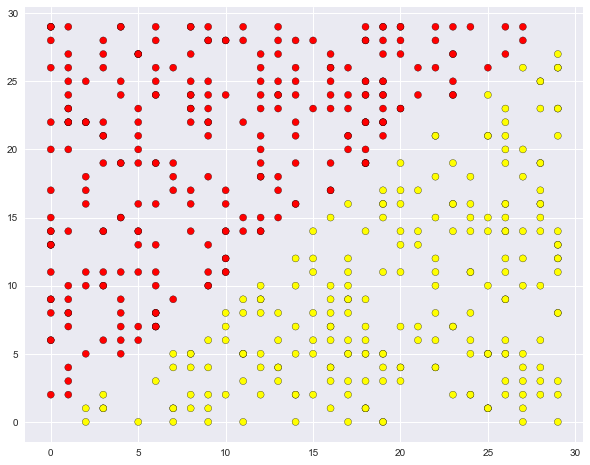

In [82]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black')


Однако дерево решений строит уж больно сложную границу и само по себе оказывается глубоким. Кроме того, представьте, как плохо дерево будет обобщаться на пространство вне представленного квадрата $30 \times 30$, обрамляющего обучающую выборку.

In [83]:
tree = DecisionTreeClassifier(random_state=17).fit(X, y)

In [84]:
xx, yy = get_grid(X)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

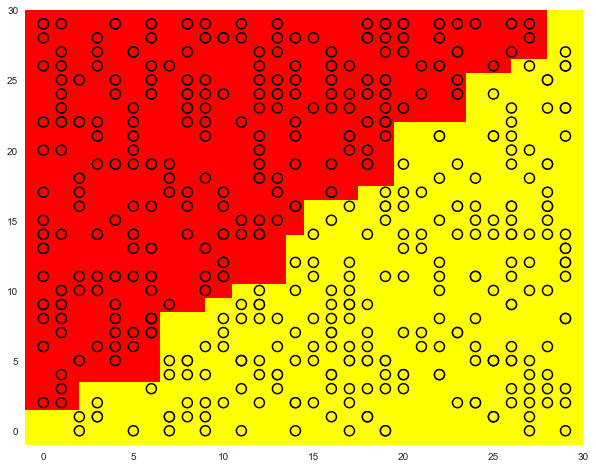

In [85]:
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', s=100, edgecolors='black', linewidth=1.5)

Вот такая сложная конструкция, хотя решение (хорошая разделяющая поверхность) – это всего лишь прямая $x_1 = x_2$.

In [86]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)

In [87]:
xx, yy = get_grid(X)
predicted = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

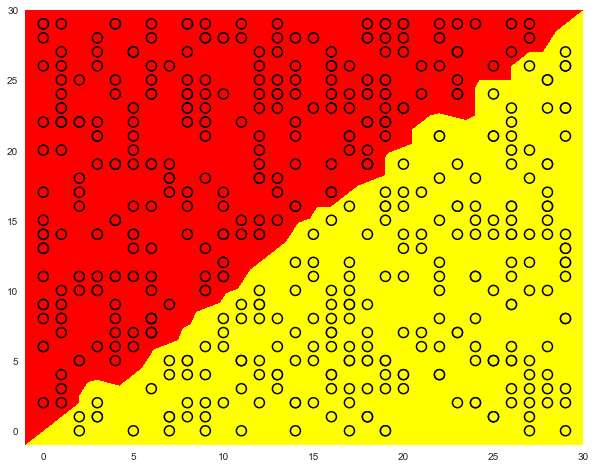

In [88]:
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', s=100, edgecolors='black', linewidth=1.5)

Лучше, но все равно сложно